In [129]:
import requests
import json
import pandas as pd
import geopandas as gpd
import os
from dotenv import load_dotenv

In [155]:
##

url = "https://api.census.gov/data/2023/acs/acs5/variables.json"

response = requests.get(url)
variables_data = response.json()

variables_list = []

for variable, info in variables_data['variables'].items():
    variables_list.append({
        'Variable': variable,
        'Label': info.get('label', ''),
        'Concept': info.get('concept', ''),
        'Group': info.get('group', '')
    })

# Convert the list of dictionaries into a DataFrame
df_variables = pd.DataFrame(variables_list)

In [150]:
load_dotenv()

api_key = os.getenv('CENSUS_API')
year = 2023
variables = "NAME,B01003,B03002,B19013,B17001,B25003,B25077,B25064,B15003"
state = "11"

url = f"https://api.census.gov/data/{year}/acs/acs5?get={variables}&for=block%20group:*&in=state:{state}%20county:*%20tract:*&key={api_key}"


response = requests.get(url)

response.text


"error: unknown variable 'B01003'"

In [151]:
data = response.json()

test = pd.DataFrame(data[1:],columns=data[0])

JSONDecodeError: Expecting value: line 1 column 1 (char 0)

In [125]:
test["GEOID"] = (
    test["state"].str.zfill(2) +
    test["county"].str.zfill(3) +
    test["tract"].str.zfill(6) +
    test["block group"]
)

In [128]:
len(test["GEOID"].unique())

571

In [109]:
response = requests.get(url)
response.text

'[["NAME","state","county","tract","block group"],\n["Block Group 1; Census Tract 1.01; District of Columbia; District of Columbia","11","001","000101","1"],\n["Block Group 1; Census Tract 1.02; District of Columbia; District of Columbia","11","001","000102","1"],\n["Block Group 2; Census Tract 1.02; District of Columbia; District of Columbia","11","001","000102","2"],\n["Block Group 3; Census Tract 1.02; District of Columbia; District of Columbia","11","001","000102","3"],\n["Block Group 1; Census Tract 2.01; District of Columbia; District of Columbia","11","001","000201","1"],\n["Block Group 2; Census Tract 2.01; District of Columbia; District of Columbia","11","001","000201","2"],\n["Block Group 1; Census Tract 2.02; District of Columbia; District of Columbia","11","001","000202","1"],\n["Block Group 2; Census Tract 2.02; District of Columbia; District of Columbia","11","001","000202","2"],\n["Block Group 3; Census Tract 2.02; District of Columbia; District of Columbia","11","001","

In [90]:
data = response.json()

In [99]:
test = pd.DataFrame(data[1:],columns=data[0])

In [113]:
test["block group"].unique()

array(['1', '2', '3', '4', '5', '6'], dtype=object)

In [131]:
dc_blockgroups_gpd = gpd.read_file("./data/shapes/tl_2023_11_bg")

<Axes: >

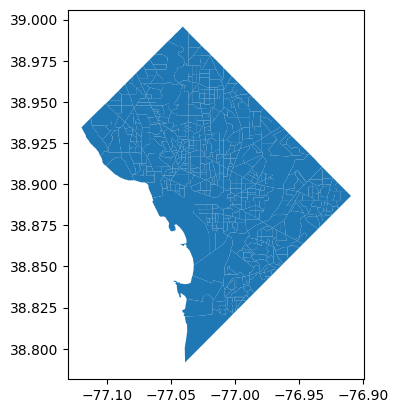

In [133]:
dc_blockgroups_gpd.plot()